<a href="https://colab.research.google.com/github/wissamee/Deep-Learning-Project/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ressources: T4 Tesla GPU

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test_data = pd.read_csv(r"test.csv")

In [ ]:
'HasBsmt' in test_data

False

In [ ]:
train_data = pd.read_csv(r"train.csv")


In [ ]:
'HasBsmt' in train_data

False

In [ ]:
y_data = pd.read_csv(r"sample_submission.csv")
y_data.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
'HasBsmt' in y_data

False

In [ ]:
new_test = pd.concat([test_data, y_data["SalePrice"]], axis=1)
new_test.shape

(1459, 81)

In [ ]:
'HasBsmt' in new_test

False

In [ ]:
df = pd.concat([new_test, train_data], axis=0, ignore_index=True)

In [ ]:
x = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.20, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2335, 80), (584, 80), (2335,), (584,))

In [ ]:
train=pd.concat([x_train, y_train], axis=1).reset_index(drop=True) # Use reset_index with drop=True to remove the original index.
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1192,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,174000.00000
1,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500.00000
2,2330,60,RL,59.0,9649,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,180258.13122
3,897,30,RM,50.0,8765,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,106500.00000
4,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.00000


In [ ]:
'HasBsmt' in train

False

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2335.000000,2335.000000,1946.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2321.000000,2334.000000,...,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,1459.828266,57.152034,69.471223,10197.277944,6.080086,5.558030,1971.367024,1984.128480,103.585093,439.090831,...,92.853105,47.494647,22.898501,2.421842,15.454818,1.810707,44.784154,6.167024,2007.787152,179683.442948
std,847.973934,42.858504,23.487336,8423.253567,1.409362,1.105003,30.223464,20.884013,181.865479,457.927244,...,124.644503,67.869297,64.627656,24.576895,54.352853,31.464363,528.736615,2.717399,1.318125,57311.607724
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,720.500000,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,154453.850799
50%,1461.000000,50.000000,68.000000,9392.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,364.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,176746.969819
75%,2200.500000,70.000000,80.000000,11554.500000,7.000000,6.000000,2000.000000,2004.000000,164.000000,732.000000,...,168.000000,69.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,191630.759064
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,870.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [ ]:
train['SalePrice'].describe()

,SalePrice
count,2335.000000
mean,179683.442948
std,57311.607724
min,34900.000000
25%,154453.850799
50%,176746.969819
75%,191630.759064
max,755000.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2335 non-null   int64  
 1   MSSubClass     2335 non-null   int64  
 2   MSZoning       2332 non-null   object 
 3   LotFrontage    1946 non-null   float64
 4   LotArea        2335 non-null   int64  
 5   Street         2335 non-null   object 
 6   Alley          156 non-null    object 
 7   LotShape       2335 non-null   object 
 8   LandContour    2335 non-null   object 
 9   Utilities      2334 non-null   object 
 10  LotConfig      2335 non-null   object 
 11  LandSlope      2335 non-null   object 
 12  Neighborhood   2335 non-null   object 
 13  Condition1     2335 non-null   object 
 14  Condition2     2335 non-null   object 
 15  BldgType       2335 non-null   object 
 16  HouseStyle     2335 non-null   object 
 17  OverallQual    2335 non-null   int64  
 18  OverallC

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2335.000000,2335.000000,1946.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2321.000000,2334.000000,...,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,1459.828266,57.152034,69.471223,10197.277944,6.080086,5.558030,1971.367024,1984.128480,103.585093,439.090831,...,92.853105,47.494647,22.898501,2.421842,15.454818,1.810707,44.784154,6.167024,2007.787152,179683.442948
std,847.973934,42.858504,23.487336,8423.253567,1.409362,1.105003,30.223464,20.884013,181.865479,457.927244,...,124.644503,67.869297,64.627656,24.576895,54.352853,31.464363,528.736615,2.717399,1.318125,57311.607724
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,720.500000,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,154453.850799
50%,1461.000000,50.000000,68.000000,9392.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,364.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,176746.969819
75%,2200.500000,70.000000,80.000000,11554.500000,7.000000,6.000000,2000.000000,2004.000000,164.000000,732.000000,...,168.000000,69.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,191630.759064
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,870.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [ ]:
'HasBsmt' in train

False

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


# 1. Reshape SalePrice for scaling
SalePrice = df['SalePrice'].values.reshape(-1, 1)

# 2. Scale SalePrice
scaler = StandardScaler()
SalePrice_scaled = scaler.fit_transform(SalePrice)

# 3. Get indices of sorted values
sorted_indices = np.argsort(SalePrice_scaled[:, 0])

# 4. Get extreme values
low_range = SalePrice_scaled[sorted_indices[:10]]
high_range = SalePrice_scaled[sorted_indices[-10:]]

print('Outer range (low) of the distribution:')
print(low_range)
print('\nOuter range (high)')
print(high_range)

Outer range (low) of the distribution:
[[-2.53004118]
 [-2.52287738]
 [-2.47775063]
 [-2.45334837]
 [-2.44114724]
 [-2.23198501]
 [-2.22326992]
 [-2.17969446]
 [-2.17969446]
 [-2.16238628]]

Outer range (high)
[[ 5.31528532]
 [ 5.60875735]
 [ 6.23908515]
 [ 6.5353983 ]
 [ 6.56295542]
 [ 7.02227567]
 [ 7.52294032]
 [ 7.75551129]
 [ 9.84713355]
 [10.0214354 ]]


In [ ]:
'HatBsmt' in train

False

The output shows the 10 lowest and 10 highest values of the 'SalePrice' column after applying standard scaling.

Outer range (low): These values represent the 10 lowest 'SalePrice' values in your dataset after standardization. They are all negative, indicating that they are below the mean of the 'SalePrice' distribution. The values range from approximately -2.16 to -2.53 standard deviations below the mean.
Outer range (high): These values represent the 10 highest 'SalePrice' values in your dataset after standardization. They are all positive and significantly above the mean. The values range from approximately 5.31 to 10.02 standard deviations above the mean.
Interpretation:

Outliers: These extreme values, especially those in the high range, could potentially be considered outliers. They are far from the average 'SalePrice' and might need further investigation. Outliers can significantly influence your model's performance, and you might want to handle them appropriately (e.g., removing them, transforming them, or using robust models that are less sensitive to outliers).
Distribution: The output also gives you an idea about the distribution of your 'SalePrice' data. The presence of these extreme values suggests that the distribution might be skewed (not perfectly symmetrical).

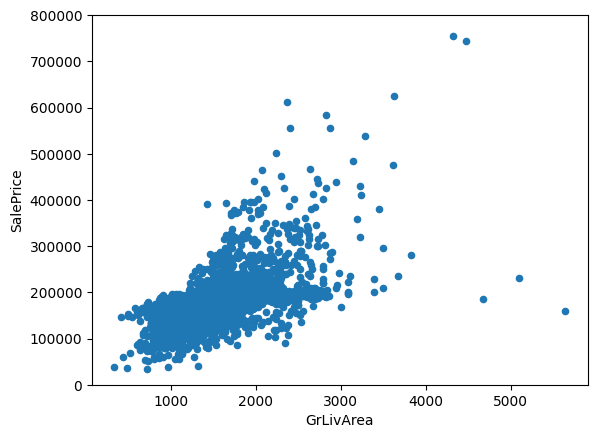

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

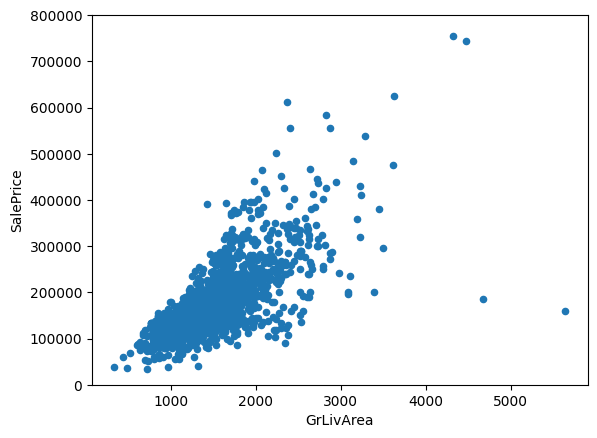

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

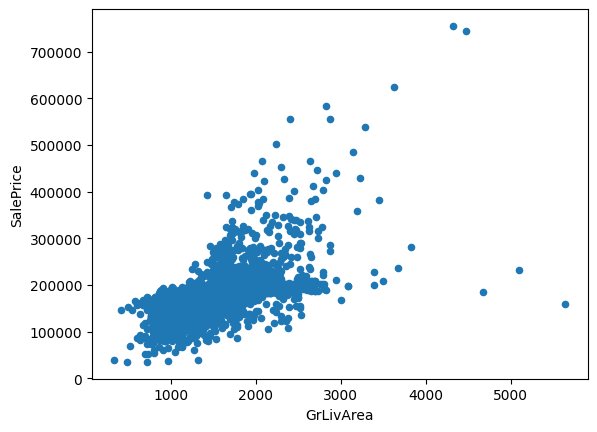

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

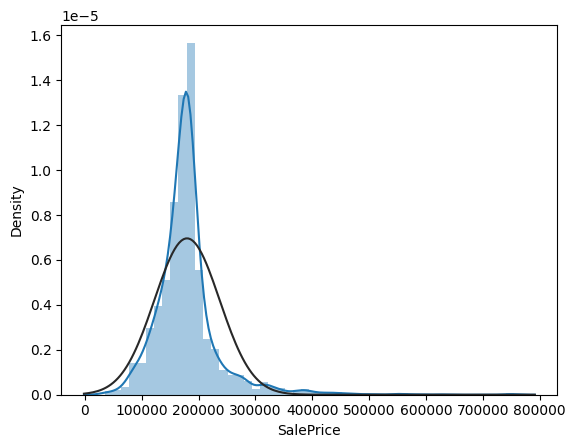

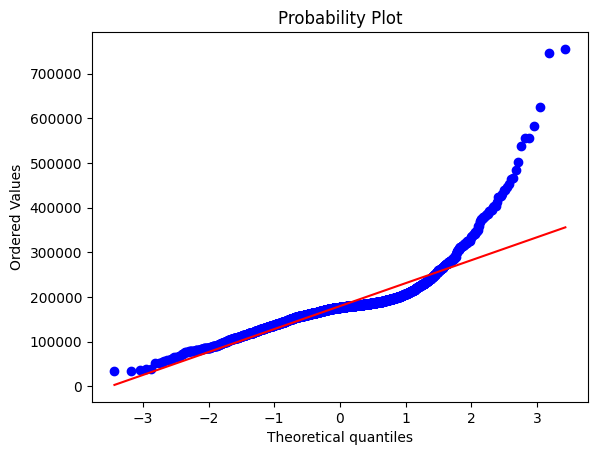

In [ ]:
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.




But everything's not lost. A simple data transformation can solve the problem.


1. **(Histogramme et courbe de densité)** :  On peut voir que la distribution est asymétrique vers la droite, ce qui indique une distribution non normale avec une queue longue à droite. Cette asymétrie suggère la présence de valeurs élevées dans `SalePrice`, qui pourraient être des outliers ou des observations inhabituelles.

2. **(Probability Plot)** : Le probability plot est utilisé pour évaluer la normalité de `SalePrice`. Les points se dévient de la ligne rouge, particulièrement dans les quantiles extrêmes (surtout à droite). Cela confirme que `SalePrice` ne suit pas une distribution normale, avec une tendance à s'éloigner de la normale dans les valeurs élevées, ce qui peut indiquer la présence de valeurs extrêmes.



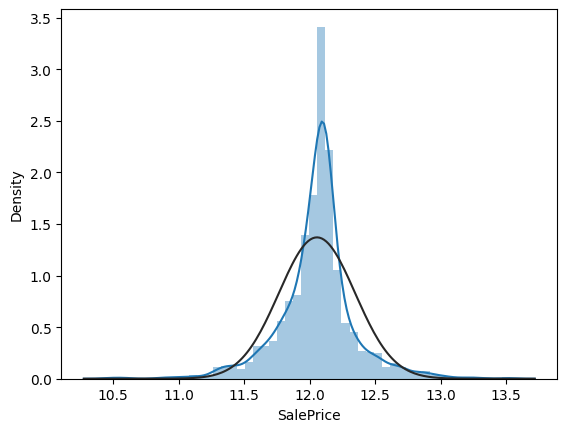

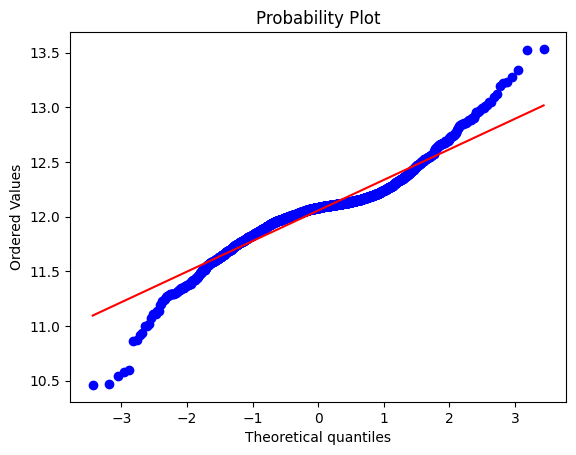

In [ ]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [ ]:
'HasBsmt' in train

False

Done! Let's check what's going on with 'GrLivArea'.

Après une transformation logarithmique

1. **(Histogramme et courbe de densité après transformation)** : La distribution de `SalePrice` semble maintenant être plus symétrique et proche d'une distribution normale, contrairement à l'image précédente. La courbe de densité ajustée (en noir) s'aligne bien avec la courbe de la distribution observée, suggérant que la transformation a réussi à atténuer l'asymétrie initiale.

2. **(Probability Plot après transformation)** : Le probability plot montre que les points suivent davantage la ligne rouge de référence, ce qui indique une meilleure correspondance avec la normalité. Cependant, quelques points aux extrêmes dévient encore de la ligne, suggérant la présence de légères anomalies ou de valeurs extrêmes. Globalement, la transformation a permis de rapprocher `SalePrice` d'une distribution normale.

la transformation appliquée a amélioré la distribution de `SalePrice`, la rendant plus conforme aux hypothèses de normalité, ce qui est souvent bénéfique pour l'analyse statistique et les modèles qui supposent une distribution normale des données.

tester d'autres variables

In [ ]:
# #histogram and normal probability plot
# sns.distplot(train['GrLivArea'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(train['GrLivArea'], plot=plt)

In [ ]:
# #data transformation
# train['GrLivArea'] = np.log(train['GrLivArea'])
# #transformed histogram and normal probability plot
# sns.distplot(train['GrLivArea'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(train['GrLivArea'], plot=plt)

In [ ]:
# #histogram and normal probability plot
# sns.distplot(train['TotalBsmtSF'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [ ]:
# #create column for new variable (one is enough because it's a binary categorical feature)
# #if area>0 it gets 1, for area==0 it gets 0
# train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
# train['HasBsmt'] = 0
# train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1
# #transform data
# train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])
# #histogram and normal probability plot
# sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)


The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'...

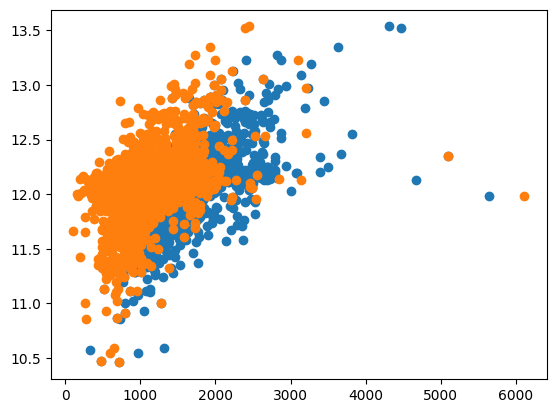

In [ ]:
#scatter plot
plt.scatter(train['GrLivArea'], train['SalePrice']);
#scatter plot
plt.scatter(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice']);

In [ ]:
missing_values = train.isnull().sum().sum()
print(missing_values)

12588


In [ ]:
Missing = train.isnull().sum()
# Filter for columns with more than 0 missing values
Missing = Missing[Missing > 0]
# Convert the Missing Series to a DataFrame
Missing_df = Missing.to_frame(name='Missing_Count')  # Name the column 'Missing_Count'
Missing_df

,Missing_Count
MSZoning,3
LotFrontage,389
Alley,2179
Utilities,1
MasVnrType,1404
MasVnrArea,14
BsmtQual,65
BsmtCond,66
BsmtExposure,66
BsmtFinType1,63


In [ ]:
'HasBsmt' in x_train

False

In [ ]:
train = train.loc[:, train.isnull().sum() / len(train) < 0.80]
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1192,160,FV,24.0,2645,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,11,2007,WD,Normal,12.066811
1,251,30,RL,55.0,5350,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,450,5,2010,WD,Normal,11.245046
2,2330,60,RL,59.0,9649,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2007,WD,Normal,12.102145
3,897,30,RM,50.0,8765,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,11.575900
4,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,12.072541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,180,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,...,184,0,0,0,0,7,2007,WD,Normal,11.512925
2331,2556,20,RL,60.0,8172,Pave,Reg,Lvl,AllPub,Inside,...,196,0,0,0,0,7,2007,WD,Normal,12.021460
2332,2591,20,RL,149.0,19958,Pave,Reg,Lvl,AllPub,Inside,...,0,0,138,0,0,7,2007,WD,Normal,12.283183
2333,2755,50,RL,50.0,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2006,WD,Normal,12.114237


In [ ]:
'HasBsmt' in train

False

In [ ]:
missing_values = train.isnull().sum().sum()
print(missing_values)

3944


In [ ]:
train.shape

(2335, 77)

In [ ]:
ordinal_cols = list(train.columns[train.columns.str.contains('Yr|Year')])
print('ordinal/temporal columns:\n', ordinal_cols)
print(len(ordinal_cols))

ordinal/temporal columns:
 ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
4


In [ ]:
temporal_cols = list(train.select_dtypes(include=['datetime64[ns]']).columns)
print('Temporal columns:\n', temporal_cols)
print(len(temporal_cols))

Temporal columns:
 []
0


In [ ]:
print(train_data.YearBuilt)
train_data.YearBuilt.max()

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64


2010

In [ ]:
print(train.YearRemodAdd)
train.YearRemodAdd.max()

0       2000
1       1966
2       2000
3       1950
4       2000
        ... 
2330    2006
2331    1955
2332    1995
2333    1950
2334    2003
Name: YearRemodAdd, Length: 2335, dtype: int64


2010

In [ ]:
print(train.GarageYrBlt)
train.GarageYrBlt.max()

0       1999.0
1          NaN
2       1999.0
3       1936.0
4       1999.0
         ...  
2330    1935.0
2331    1959.0
2332    1958.0
2333    1953.0
2334    2003.0
Name: GarageYrBlt, Length: 2335, dtype: float64


2207.0

In [ ]:
train['GarageYrBlt'] = train['GarageYrBlt'].astype('Int64')
print(train.GarageYrBlt)
train.GarageYrBlt.max()

0       1999
1       <NA>
2       1999
3       1936
4       1999
        ... 
2330    1935
2331    1959
2332    1958
2333    1953
2334    2003
Name: GarageYrBlt, Length: 2335, dtype: Int64


2207

In [ ]:
print(train.YrSold)
train.YrSold.max()

0       2007
1       2010
2       2007
3       2006
4       2007
        ... 
2330    2007
2331    2007
2332    2007
2333    2006
2334    2007
Name: YrSold, Length: 2335, dtype: int64


2010

In [ ]:
# Identification des colonnes nominales
nominal_cols = list(train.select_dtypes(include=['object']).columns)
print('Nominal columns:\n', nominal_cols)
print(len(nominal_cols))

Nominal columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
39


In [ ]:
'HasBsmt' in train

False

In [ ]:
# Identification des colonnes numériques
numeric_cols = list(set(train.select_dtypes(exclude=['object']).columns) - set(ordinal_cols) - set(temporal_cols))
print('Numeric columns:\n', numeric_cols)
print(len(numeric_cols))

Numeric columns:
 ['1stFlrSF', '3SsnPorch', 'OverallCond', 'EnclosedPorch', 'PoolArea', 'BsmtFullBath', 'WoodDeckSF', 'MSSubClass', 'BedroomAbvGr', 'MoSold', 'OverallQual', 'LowQualFinSF', 'BsmtHalfBath', 'BsmtFinSF1', '2ndFlrSF', 'MiscVal', 'KitchenAbvGr', 'FullBath', 'OpenPorchSF', 'MasVnrArea', 'Id', 'HalfBath', 'GarageCars', 'BsmtUnfSF', 'SalePrice', 'LotArea', 'ScreenPorch', 'Fireplaces', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'LotFrontage', 'GrLivArea', 'BsmtFinSF2']
34


In [ ]:
len(numeric_cols)+len(nominal_cols)+len(ordinal_cols)+len(temporal_cols)

77

In [ ]:
'MoSold' in numeric_cols

True

In [ ]:
def missing_val_imputation(x, ordinal_cols, nominal_cols, numeric_cols):

    # colonnes ordinales: médiane
    for col in ordinal_cols:
        x.loc[:, col] = x.loc[:, col].fillna(x.loc[:, col].median())

    # colonnes nominales: mode
    for col in nominal_cols:
        x.loc[:, col] = x.loc[:, col].fillna(x.loc[:, col].mode()[0])  # Prendre le premier mode

    # colonnes numériques: médiane
    for col in numeric_cols:
        x.loc[:, col] = x.loc[:, col].fillna(x.loc[:, col].median())

    print("All missing values are now imputed!\n", x.isnull().sum().sort_values(ascending=False))

    return x

In [ ]:
train= missing_val_imputation(train,ordinal_cols,nominal_cols,numeric_cols)

All missing values are now imputed!
 Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 77, dtype: int64


In [ ]:
'HatBsmt' in train

False

In [ ]:
print(train.isnull().sum().sum())

0


In [ ]:
#Doublons:
duplicate_count = train.duplicated().sum()
print(duplicate_count)

0


In [ ]:
# List to store columns with outliers
outlier_columns = []

# Loop through the specified columns
for column in numeric_cols:
    if column in train_data.columns:  # Check if the column exists in the DataFrame
        Q1 = train_data[column].quantile(0.25)  # First quartile
        Q3 = train_data[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range

        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound

        # Identify outliers
        outlier_values = train_data[(train_data[column] < lower_bound) | (train_data[column] > upper_bound)]

        # Check if there are outliers
        if not outlier_values.empty:
            outlier_columns.append(column)  # Add the column to the list if it contains outliers

# Display the columns with outliers
print("Columns containing outliers:", outlier_columns)
print(len(outlier_columns))

Columns containing outliers: ['1stFlrSF', '3SsnPorch', 'OverallCond', 'EnclosedPorch', 'PoolArea', 'BsmtFullBath', 'WoodDeckSF', 'MSSubClass', 'BedroomAbvGr', 'OverallQual', 'LowQualFinSF', 'BsmtHalfBath', 'BsmtFinSF1', '2ndFlrSF', 'MiscVal', 'KitchenAbvGr', 'OpenPorchSF', 'MasVnrArea', 'GarageCars', 'BsmtUnfSF', 'SalePrice', 'LotArea', 'ScreenPorch', 'Fireplaces', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'LotFrontage', 'GrLivArea', 'BsmtFinSF2']
30


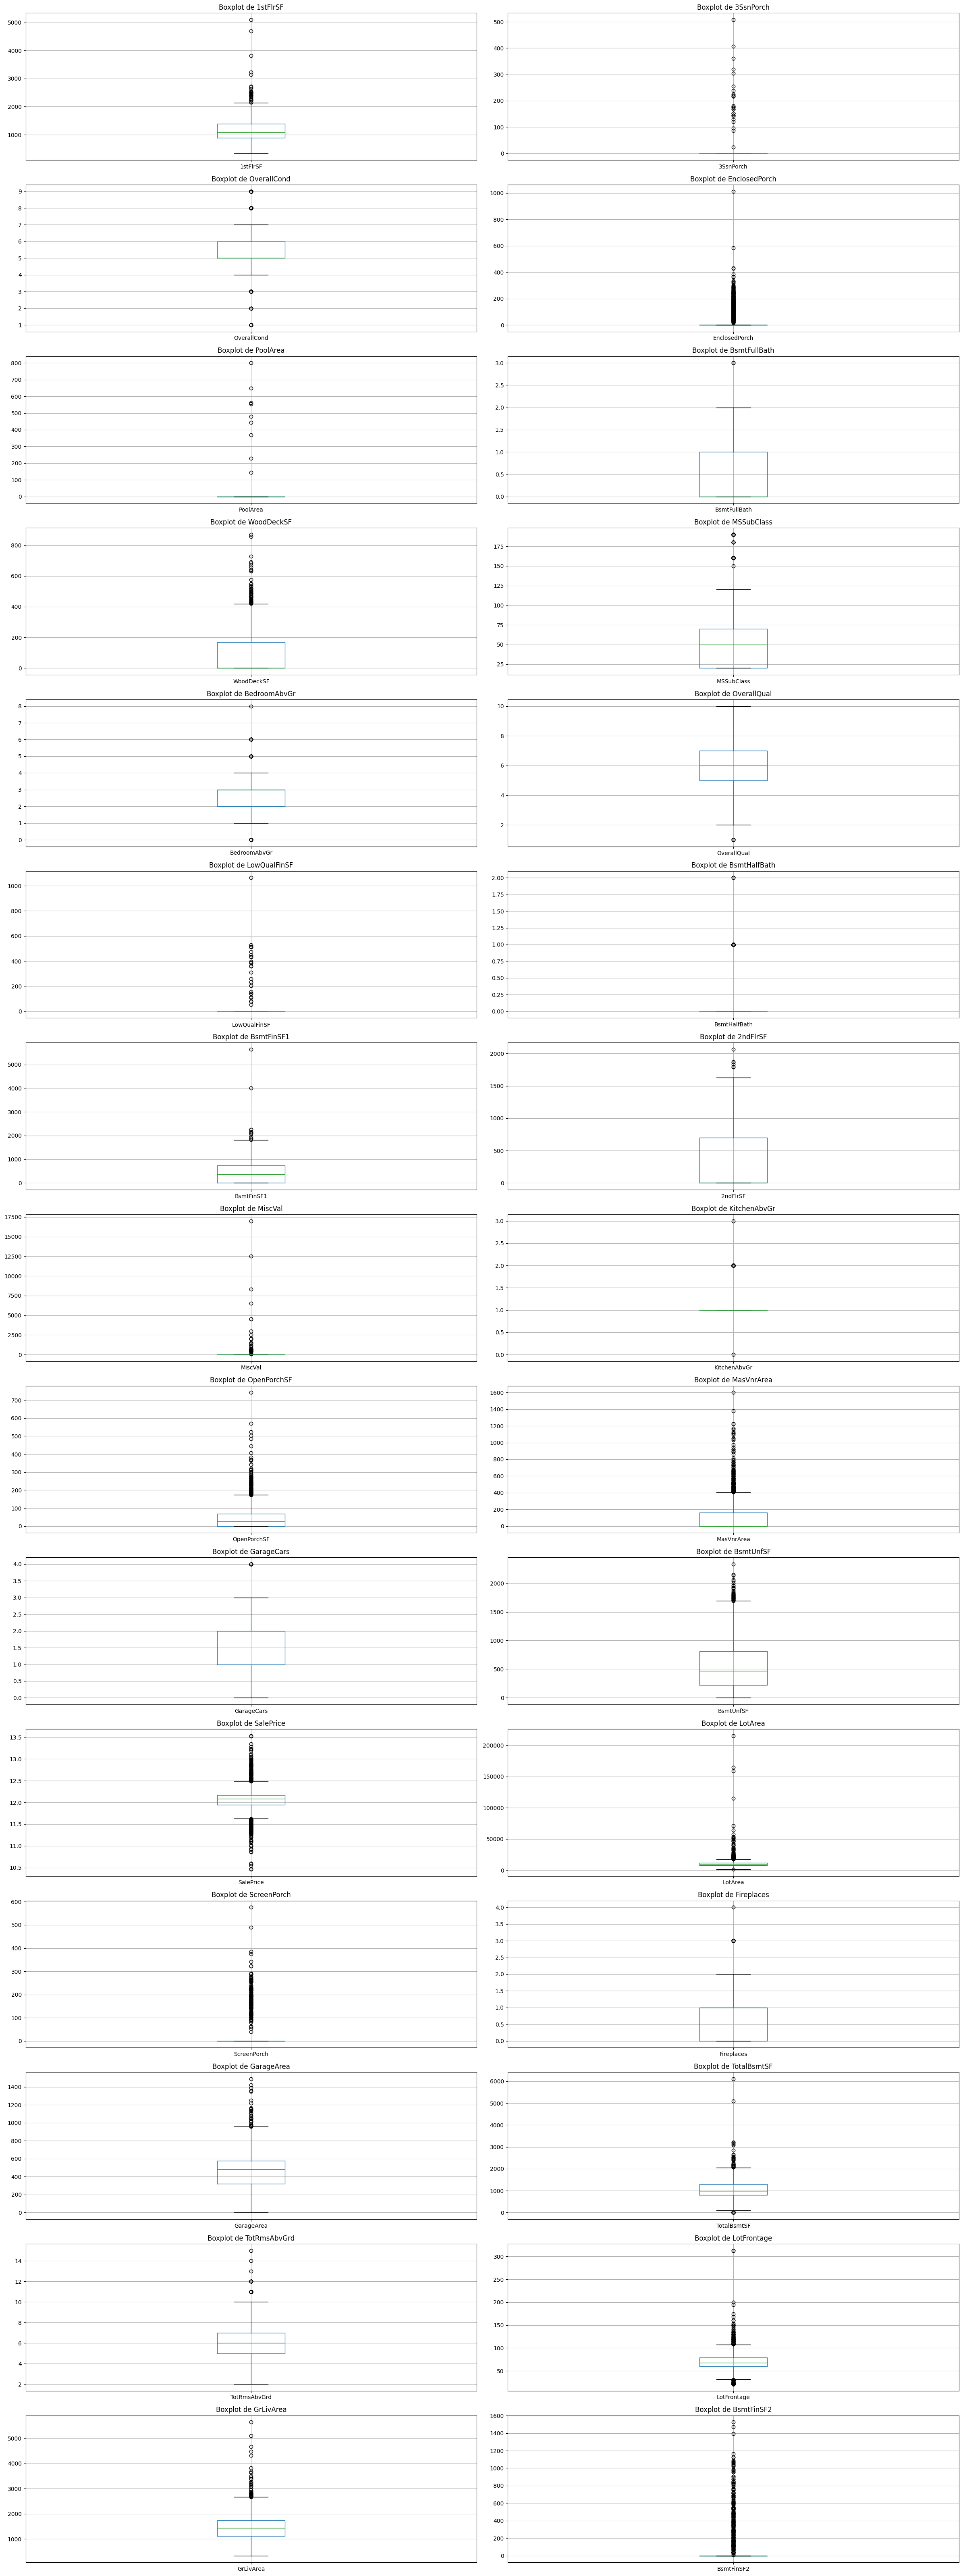

In [ ]:
# Définir le nombre de colonnes pour les sous-graphes
n_cols = 2
n_rows = (len(outlier_columns) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

# Créer les sous-graphes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 64))
axes = axes.flatten()  # Aplatir la matrice des axes

# Créer un boxplot pour chaque variable dans la liste t
for i, column in enumerate(outlier_columns):
    train.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')

# Supprimer les sous-graphes non utilisés
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
train[train['BsmtFullBath']==3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1956,739,90,RL,60.0,10800,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2009,WD,Alloca,12.095141
2246,1840,90,RL,60.0,10800,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2009,WD,Alloca,12.092446


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
## Fitting OHE object
## The 'sparse' argument has been removed, and 'sparse_output' is used instead
## Setting sparse_output=False to get a dense array
#ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(train[nominal_cols])
#
## Feature Encoding for nominal columns
#def ohe_transform(x, ohe, nominal_cols):
#    x_ohe = pd.DataFrame(ohe.transform(x[nominal_cols]))
#    x_ohe.columns = ohe.get_feature_names_out(nominal_cols)
#
#    # prepping x
#    x = x.drop(nominal_cols, axis=1)
#    x.reset_index(inplace=True, drop=True)
#    x = x.merge(x_ohe, left_index=True, right_index=True)
#
#    return x
#
#train = ohe_transform(train, ohe, nominal_cols)
#train.shape

In [ ]:
'HatBsmt' in x_train

False

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Création de l'objet OneHotEncoder avec drop='first' pour éviter la redondance
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False).fit(train[nominal_cols])

# Fonction d'encodage avec OneHotEncoder
def ohe_transform(x, ohe, nominal_cols):
    # Appliquer l'encodage
    x_ohe = pd.DataFrame(ohe.transform(x[nominal_cols]))
    x_ohe.columns = ohe.get_feature_names_out(nominal_cols)

    # Préparation de x en supprimant les colonnes nominales originales et ajoutant les nouvelles colonnes encodées
    x = x.drop(nominal_cols, axis=1)
    x.reset_index(inplace=True, drop=True)
    x = pd.concat([x, x_ohe], axis=1)

    return x

# Application de l'encodage sur le DataFrame train
train = ohe_transform(train, ohe, nominal_cols)
train.head()
train.shape



(2335, 235)

In [ ]:
'HasBsmt' in train

False

In [ ]:
x_train = train.drop(columns=['SalePrice']).reset_index(drop=True)
y_train = train['SalePrice']

In [ ]:
'HasBsmt' in train

False

In [ ]:
train.shape

(2335, 235)

moyenne et variance avant la standarisation des données

In [ ]:
mean = train.mean()
var = train.var()

In [ ]:
'HasBsmt' in x_train

False

In [ ]:
# train = train.drop('HasBmt')
# x_train = x_train.drop('HasBmt')

In [ ]:
#Standardisation (Standard Scaling) (pour les algos à base de distance)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
#standarisation justre sur les données train sans target
x_train[:] = ss.fit_transform(x_train)
x_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.315913,2.400224,-2.109101,-0.896791,1.362550,-0.505111,0.914485,0.760147,1.945566,-0.959202,...,-0.058634,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171
1,-1.425854,-0.633663,-0.663429,-0.575587,-2.185916,-3.220618,-1.038059,-0.868241,-0.567430,-0.959202,...,-0.058634,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171
2,1.026397,0.066465,-0.476891,-0.065105,-0.056836,-0.505111,0.914485,0.760147,-0.567430,-0.959202,...,-0.058634,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171
3,-0.663875,-0.633663,-0.896602,-0.170075,-1.476223,0.400058,-1.170435,-1.634542,-0.567430,-0.336569,...,-0.058634,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,-2.196120,-0.300171
4,-0.004516,0.066465,-0.336987,-0.270770,-0.056836,-0.505111,0.914485,0.760147,-0.567430,-0.959202,...,-0.058634,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171


In [ ]:
train = pd.concat([x_train, y_train], axis=1).reset_index(drop=True)
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,-0.315913,2.400224,-2.109101,-0.896791,1.362550,-0.505111,0.914485,0.760147,1.945566,-0.959202,...,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171,12.066811
1,-1.425854,-0.633663,-0.663429,-0.575587,-2.185916,-3.220618,-1.038059,-0.868241,-0.567430,-0.959202,...,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171,11.245046
2,1.026397,0.066465,-0.476891,-0.065105,-0.056836,-0.505111,0.914485,0.760147,-0.567430,-0.959202,...,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171,12.102145
3,-0.663875,-0.633663,-0.896602,-0.170075,-1.476223,0.400058,-1.170435,-1.634542,-0.567430,-0.336569,...,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,-2.196120,-0.300171,11.575900
4,-0.004516,0.066465,-0.336987,-0.270770,-0.056836,-0.505111,0.914485,0.760147,-0.567430,-0.959202,...,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171,12.072541


In [ ]:
import joblib  # pour enregistrer et téléchargé le modèle/ scaler
import os

# enregistrer le  scaler
joblib.dump(ss, 'ss.pkl')

['ss.pkl']

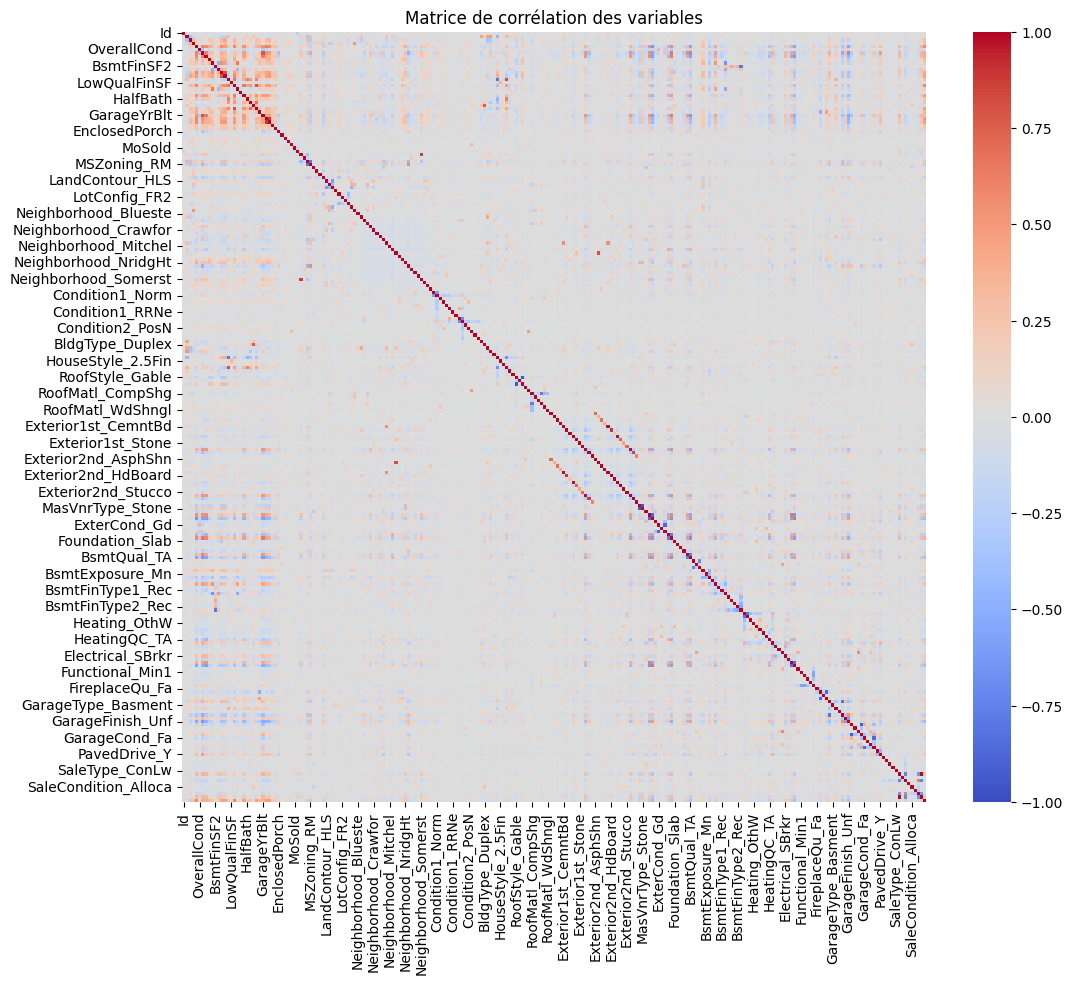

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=False)
plt.title("Matrice de corrélation des variables")
plt.show()

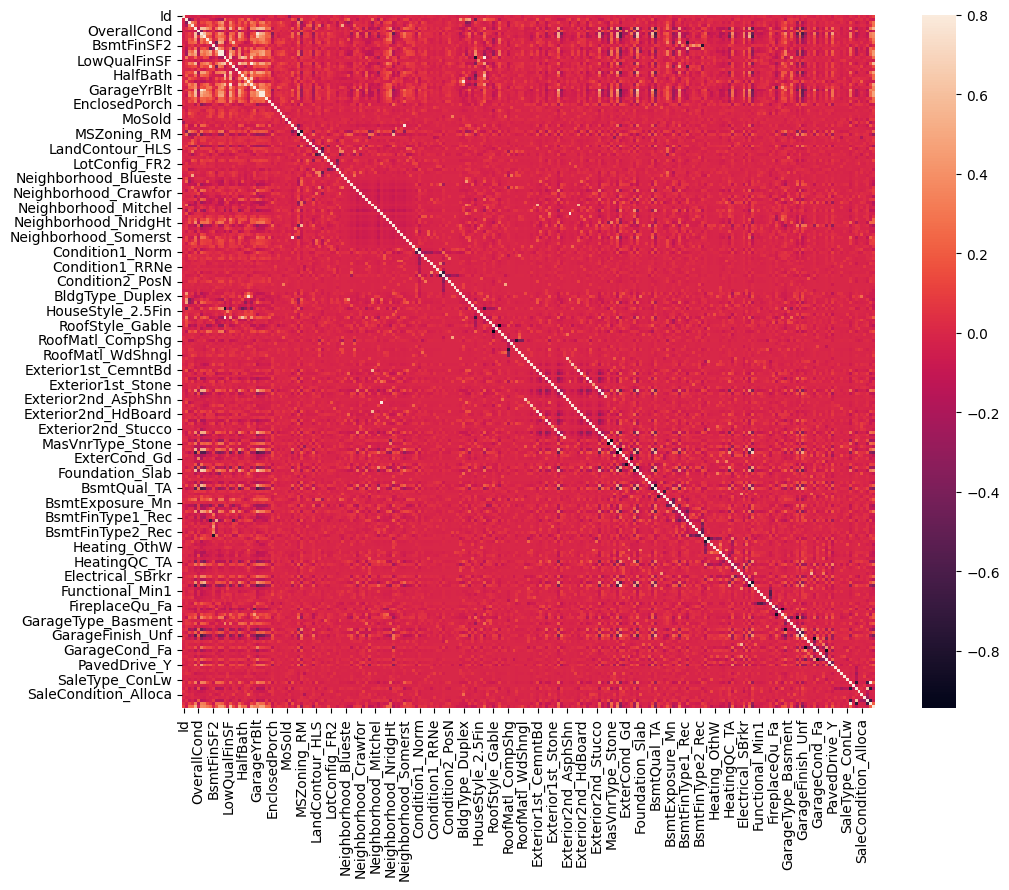

In [ ]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

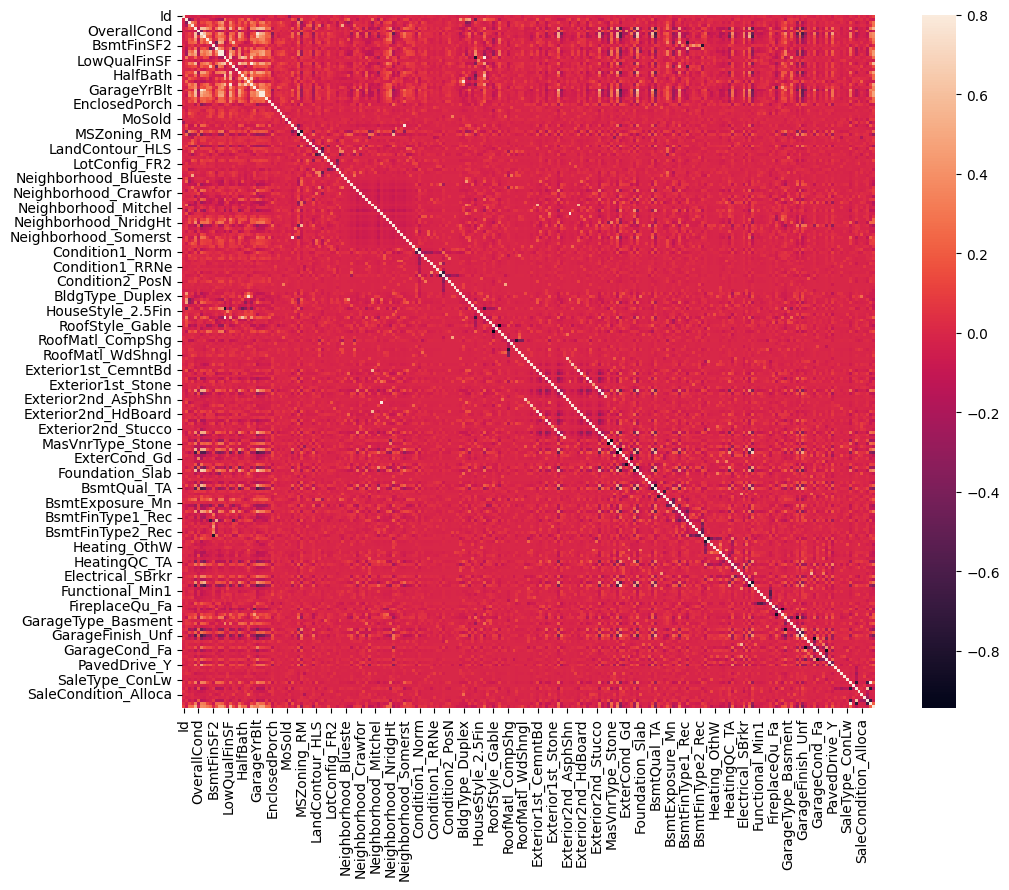

In [ ]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
correlation_matrix = train.corr(method='pearson')
correlation_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,1.000000,0.005538,-0.018530,-0.038244,-0.025508,0.006798,-0.031219,-0.056048,-0.025318,-0.022331,...,-0.030176,0.036159,0.000340,-0.036969,0.057844,-0.009147,0.023137,-0.030969,0.036016,0.110558
MSSubClass,0.005538,1.000000,-0.378600,-0.181600,0.031264,-0.052826,0.028229,0.039484,0.018929,-0.045809,...,0.002731,-0.039840,-0.014394,0.042951,0.004559,0.037033,-0.026565,0.035987,-0.044294,-0.072651
LotFrontage,-0.018530,-0.378600,1.000000,0.349494,0.198049,-0.066756,0.119120,0.085285,0.199009,0.200244,...,-0.045147,0.119536,-0.002508,-0.094614,-0.041859,0.003226,-0.007317,-0.086758,0.115349,0.293965
LotArea,-0.038244,-0.181600,0.349494,1.000000,0.105664,-0.031739,0.033793,0.024208,0.128779,0.204046,...,-0.016295,0.034467,-0.005322,-0.017375,-0.015210,0.023648,0.014623,-0.025802,0.036283,0.276398
OverallQual,-0.025508,0.031264,0.198049,0.105664,1.000000,-0.095011,0.600485,0.575761,0.423064,0.279390,...,-0.047592,0.336172,-0.056917,-0.187201,-0.036473,-0.050486,-0.012046,-0.130460,0.328422,0.566781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_Alloca,-0.009147,0.037033,0.003226,0.023648,-0.050486,-0.035800,-0.025177,-0.027527,-0.017456,0.042593,...,-0.005224,-0.028190,-0.004835,0.037688,-0.005224,1.000000,-0.011921,-0.209211,-0.028595,-0.013385
SaleCondition_Family,0.023137,-0.026565,-0.007317,0.014623,-0.012046,-0.019158,-0.030854,-0.045386,-0.008327,-0.032746,...,-0.006862,-0.037029,0.062309,-0.021624,-0.006862,-0.011921,1.000000,-0.274813,-0.037562,-0.018062
SaleCondition_Normal,-0.030969,0.035987,-0.086758,-0.025802,-0.130460,0.173470,-0.138886,-0.099605,-0.050892,-0.017980,...,0.024969,-0.649859,-0.089037,0.623179,-0.120424,-0.209211,-0.274813,1.000000,-0.659212,-0.067557
SaleCondition_Partial,0.036016,-0.044294,0.115349,0.036283,0.328422,-0.136134,0.337657,0.320689,0.116481,0.039417,...,-0.016460,0.985812,-0.015236,-0.740555,-0.016460,-0.028595,-0.037562,-0.659212,1.000000,0.213738


In [ ]:
min_value = correlation_matrix.where(~correlation_matrix.isin([-1])).min().min()
min_value

-0.9432872248415906

In [ ]:
max_corr_value = correlation_matrix.where(~correlation_matrix.isin([1])).max().max()
max_corr_value

0.985811729352649

In [ ]:
train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,-0.315913,2.400224,-2.109101,-0.896791,1.362550,-0.505111,0.914485,0.760147,1.945566,-0.959202,...,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171,12.066811
1,-1.425854,-0.633663,-0.663429,-0.575587,-2.185916,-3.220618,-1.038059,-0.868241,-0.567430,-0.959202,...,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171,11.245046
2,1.026397,0.066465,-0.476891,-0.065105,-0.056836,-0.505111,0.914485,0.760147,-0.567430,-0.959202,...,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171,12.102145
3,-0.663875,-0.633663,-0.896602,-0.170075,-1.476223,0.400058,-1.170435,-1.634542,-0.567430,-0.336569,...,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,-2.196120,-0.300171,11.575900
4,-0.004516,0.066465,-0.336987,-0.270770,-0.056836,-0.505111,0.914485,0.760147,-0.567430,-0.959202,...,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171,12.072541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-1.509601,-0.633663,-0.430256,-0.199167,-0.766529,0.400058,-1.600656,1.047510,-0.567430,-0.959202,...,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171,11.512925
2331,1.292972,-0.867039,-0.430256,-0.240490,-1.476223,-0.505111,-0.541650,-1.395073,-0.567430,0.229262,...,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171,12.021460
2332,1.334256,-0.867039,3.720220,1.159031,-0.056836,2.210395,-0.442368,0.520678,6.177981,-0.959202,...,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171,12.283183
2333,1.527699,-0.166911,-0.896602,-0.320287,-0.056836,0.400058,-0.806401,-1.634542,-0.567430,-0.959202,...,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171,12.114237


In [ ]:
y = train["SalePrice"]


x = train.drop(columns=["SalePrice"])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

model = RandomForestRegressor()
model.fit(x, y)

# Extraire les features les plus importantes
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
selected_features = feature_importances.nlargest(100).index
X_selected = x[selected_features]
X_selected

,GrLivArea,Id,OverallQual,YearBuilt,TotalBsmtSF,GarageArea,LotArea,CentralAir_Y,BsmtFinSF1,BedroomAbvGr,...,Neighborhood_BrkSide,BldgType_TwnhsE,Exterior1st_VinylSd,MiscVal,Neighborhood_CollgCr,BsmtFinType1_Unf,RoofStyle_Hip,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,SaleType_New
0,-0.107705,-0.315913,1.362550,0.914485,-0.621957,0.087700,-0.896791,0.267568,-0.959202,-1.047204,...,-0.189568,-0.291611,-0.732246,-0.084718,-0.32171,1.452304,-0.479836,-0.382483,-0.315184,-0.295912
1,-0.375792,-1.425854,-2.185916,-1.038059,-0.730048,-2.198003,-0.575587,0.267568,-0.959202,0.173576,...,5.275146,-0.291611,-0.732246,0.766549,-0.32171,1.452304,-0.479836,-0.382483,3.172751,-0.295912
2,0.295418,1.026397,-0.056836,0.914485,-0.250395,-0.060964,-0.065105,0.267568,-0.959202,0.173576,...,-0.189568,-0.291611,1.365661,-0.084718,-0.32171,1.452304,-0.479836,-0.382483,-0.315184,-0.295912
3,-1.080760,-0.663875,-1.476223,-1.170435,-0.227876,-0.678847,-0.170075,-3.737372,-0.336569,-1.047204,...,-0.189568,-0.291611,-0.732246,-0.084718,-0.32171,-0.688561,-0.479836,2.614492,-0.315184,-0.295912
4,0.301375,-0.004516,-0.056836,0.914485,-0.223373,-0.060964,-0.270770,0.267568,-0.959202,0.173576,...,-0.189568,-0.291611,1.365661,-0.084718,-0.32171,1.452304,-0.479836,-0.382483,-0.315184,-0.295912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-1.047001,-1.509601,-0.766529,-1.600656,-0.189594,0.031951,-0.199167,0.267568,-0.959202,-1.047204,...,-0.189568,-0.291611,-0.732246,-0.084718,-0.32171,1.452304,-0.479836,2.614492,-0.315184,-0.295912
2331,-1.444166,1.292972,-1.476223,-0.541650,-0.639972,-0.548766,-0.240490,0.267568,0.229262,-1.047204,...,-0.189568,-0.291611,-0.732246,-0.084718,-0.32171,-0.688561,-0.479836,-0.382483,-0.315184,-0.295912
2332,1.556418,1.334256,-0.056836,-0.442368,-1.052068,-0.056318,1.159031,0.267568,-0.959202,1.394355,...,-0.189568,-0.291611,-0.732246,-0.084718,-0.32171,1.452304,2.084046,-0.382483,-0.315184,-0.295912
2333,-0.363877,1.527699,-0.056836,-0.806401,-0.603942,0.817081,-0.320287,0.267568,-0.959202,0.173576,...,-0.189568,-0.291611,1.365661,-0.084718,-0.32171,1.452304,-0.479836,-0.382483,-0.315184,-0.295912


In [ ]:
X_selected

,GrLivArea,Id,OverallQual,YearBuilt,TotalBsmtSF,GarageArea,LotArea,CentralAir_Y,BsmtFinSF1,BedroomAbvGr,...,Neighborhood_BrkSide,BldgType_TwnhsE,Exterior1st_VinylSd,MiscVal,Neighborhood_CollgCr,BsmtFinType1_Unf,RoofStyle_Hip,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,SaleType_New
0,-0.107705,-0.315913,1.362550,0.914485,-0.621957,0.087700,-0.896791,0.267568,-0.959202,-1.047204,...,-0.189568,-0.291611,-0.732246,-0.084718,-0.32171,1.452304,-0.479836,-0.382483,-0.315184,-0.295912
1,-0.375792,-1.425854,-2.185916,-1.038059,-0.730048,-2.198003,-0.575587,0.267568,-0.959202,0.173576,...,5.275146,-0.291611,-0.732246,0.766549,-0.32171,1.452304,-0.479836,-0.382483,3.172751,-0.295912
2,0.295418,1.026397,-0.056836,0.914485,-0.250395,-0.060964,-0.065105,0.267568,-0.959202,0.173576,...,-0.189568,-0.291611,1.365661,-0.084718,-0.32171,1.452304,-0.479836,-0.382483,-0.315184,-0.295912
3,-1.080760,-0.663875,-1.476223,-1.170435,-0.227876,-0.678847,-0.170075,-3.737372,-0.336569,-1.047204,...,-0.189568,-0.291611,-0.732246,-0.084718,-0.32171,-0.688561,-0.479836,2.614492,-0.315184,-0.295912
4,0.301375,-0.004516,-0.056836,0.914485,-0.223373,-0.060964,-0.270770,0.267568,-0.959202,0.173576,...,-0.189568,-0.291611,1.365661,-0.084718,-0.32171,1.452304,-0.479836,-0.382483,-0.315184,-0.295912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-1.047001,-1.509601,-0.766529,-1.600656,-0.189594,0.031951,-0.199167,0.267568,-0.959202,-1.047204,...,-0.189568,-0.291611,-0.732246,-0.084718,-0.32171,1.452304,-0.479836,2.614492,-0.315184,-0.295912
2331,-1.444166,1.292972,-1.476223,-0.541650,-0.639972,-0.548766,-0.240490,0.267568,0.229262,-1.047204,...,-0.189568,-0.291611,-0.732246,-0.084718,-0.32171,-0.688561,-0.479836,-0.382483,-0.315184,-0.295912
2332,1.556418,1.334256,-0.056836,-0.442368,-1.052068,-0.056318,1.159031,0.267568,-0.959202,1.394355,...,-0.189568,-0.291611,-0.732246,-0.084718,-0.32171,1.452304,2.084046,-0.382483,-0.315184,-0.295912
2333,-0.363877,1.527699,-0.056836,-0.806401,-0.603942,0.817081,-0.320287,0.267568,-0.959202,0.173576,...,-0.189568,-0.291611,1.365661,-0.084718,-0.32171,1.452304,-0.479836,-0.382483,-0.315184,-0.295912


In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_selected)

# variance expliquée cumulée
cumulative_variance = pca.explained_variance_ratio_.cumsum()


n_components = next(i for i, cumulative in enumerate(cumulative_variance) if cumulative >= 0.90) + 1
n_components

58

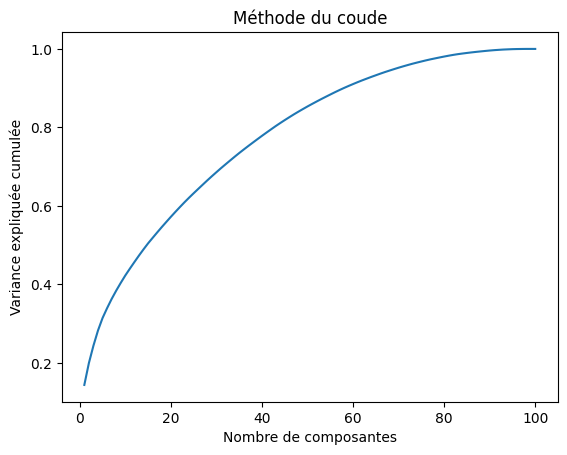

In [ ]:
import matplotlib.pyplot as plt

# courbe de la variance expliquée cumulée
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Méthode du coude')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=57)

principalComponents = pca.fit_transform(X_selected)
# enregistrer pca
joblib.dump(pca, 'pca.pkl')

train_pca = pd.DataFrame(data = principalComponents)
train_pca

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.959505,-4.618064,-0.547704,-1.625769,-2.378049,2.702719,1.824164,-1.671833,-0.577221,1.075861,...,0.199498,0.021869,-0.153828,0.365116,-0.325074,-0.003492,0.063665,1.508611,0.295729,0.309263
1,-4.024168,0.487458,-0.066920,0.183559,2.205929,-2.775759,-2.047537,-2.609169,-0.987093,1.941748,...,-0.482877,-0.769095,-0.029643,0.742109,0.758297,0.593205,1.442147,0.891670,0.421315,0.165877
2,2.598792,-1.519615,0.947240,-2.816151,2.495707,0.117032,-0.962556,-1.236937,-0.771672,-0.145482,...,-0.937295,1.016877,-0.227166,-0.250424,-0.475812,0.171606,-0.029215,0.944002,0.553369,-0.324845
3,-5.593529,-1.919278,-0.829419,2.117835,-1.281641,-1.153236,-0.601859,0.462986,0.040587,-1.764589,...,-0.595575,0.980501,-0.892396,1.436419,-0.773690,-0.124206,-0.470131,-0.873094,0.316383,-0.072664
4,2.104311,-2.007991,0.790568,-2.419243,2.705841,0.517588,-0.732832,-1.446351,-0.296591,-0.390305,...,0.474717,-0.012278,-0.427904,0.665152,0.212722,0.206145,0.218282,0.760306,0.259703,-0.304458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-4.795628,-2.547728,-0.177837,1.563611,-1.034753,-1.442006,2.257138,0.540338,-0.857037,-2.179969,...,0.010460,0.111690,-0.312189,-0.333319,-1.224662,-1.648219,1.833228,0.056349,0.327581,0.583258
2331,-5.218507,1.072242,-1.548436,-0.302387,-0.209330,1.619620,0.304175,-0.808134,-0.918230,2.357268,...,-0.403185,0.343066,0.114801,-0.442272,0.262926,-0.082077,-0.113609,0.135531,0.073741,-0.035736
2332,0.958730,3.031820,3.544225,1.228294,1.171416,0.047906,3.314297,-0.353762,-0.916187,-1.720899,...,1.336413,-1.530921,0.349921,2.252243,0.062464,-0.111972,-2.764695,1.623054,-0.390669,-0.761107
2333,-3.259282,-1.112493,0.242030,0.538348,2.270106,1.034630,0.892416,0.884497,-0.160594,-0.459839,...,0.206181,-0.784277,-0.076161,-1.394660,0.510767,0.027542,0.950310,0.877160,0.218638,0.305678


In [ ]:
train_pca.columns

RangeIndex(start=0, stop=57, step=1)

**57 à discuter**


**Training**

- Hyperparameter Tuning:
- Regularization:
- Evaluation:

**Modèle ML**

Régression linéaire ; Random forest regressor, Regression logistique....

In [ ]:
#free choice not necessary

**Pourquoi ANN ?**

Conseils pour la comparaison d'architectures ANN :

- **Fonction d'activation :** Expérimentez avec différentes fonctions d'activation, comme ReLU, sigmoid ou tanh, pour trouver celle qui convient le mieux à vos données.
- **Optimisateur :** Testez différents optimiseurs, comme Adam, SGD ou RMSprop, pour optimiser l'entraînement de votre modèle.
- **Régularisation :** Utilisez des techniques de régularisation, comme le dropout ou la régularisation L1/L2, pour éviter le surapprentissage.
- **Taille du lot :** Ajustez la taille du lot lors de l'entraînement pour trouver un bon équilibre entre vitesse et performances.
- **Nombre d'époques :** Entraînez votre modèle pour un nombre suffisant d'époques pour atteindre une convergence optimale.

**ANN**

libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras

Perceptron

In [ ]:
#wissame

MLP

In [ ]:
#wissame

DNN

In [ ]:
#aya

RNN

In [ ]:
#salma

LSTM

In [ ]:
#raja

GRU

In [ ]:
#nassima


*   Les CNN sont principalement utilisés pour le traitement d'images et de vidéos
*   Les RNN sont spécialisés dans le traitement de données séquentielles.



**Évaluation des performances :**

Utilisez les mêmes métriques que précédemment (RMSE, R2) pour comparer les performances des différentes architectures ANN sur les données de test. Vous pouvez également visualiser les courbes d'apprentissage pour analyser le processus d'entraînement.

**Comparaison**

**Test preprocessing**

On va faire la meme standarisation de nos données de test

In [ ]:
# télécharger le  scaler enrigstré aupaavant
ss = joblib.load('ss.pkl')
#ss.feature_names_in_

In [ ]:
# ss.mean_

In [ ]:
ss.n_features_in_

234

In [ ]:
# test_neww =pd.concat([x_test, y_test], axis=1)
# test_neww = test_neww.reset_index(drop=True) # Use reset_index with drop=True to remove the original index.
# test_neww.head()

In [ ]:
x_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2437,979,20,RL,68.0,9450,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Abnorml
2470,1012,90,RL,75.0,9825,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2359,901,20,RL,NaN,7340,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
789,2250,20,RL,74.0,12395,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
1642,184,50,RM,63.0,11426,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,1422,120,RL,53.0,4043,Pave,NaN,Reg,Lvl,AllPub,...,165,0,NaN,NaN,NaN,0,7,2010,WD,Normal
2295,837,30,RM,90.0,8100,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,GdWo,NaN,0,6,2007,COD,Normal
2222,764,60,RL,82.0,9430,Pave,NaN,Reg,Lvl,AllPub,...,180,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1090,2551,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [ ]:
numeric_cols.remove('SalePrice')

In [ ]:
'SalePrice' in numeric_cols

False

In [ ]:
x_test = missing_val_imputation(x_test,ordinal_cols,nominal_cols,numeric_cols)

All missing values are now imputed!
 PoolQC           580
MiscFeature      557
Alley            542
Fence            469
Id                 0
                ... 
MasVnrArea         0
MasVnrType         0
Exterior2nd        0
Exterior1st        0
SaleCondition      0
Length: 80, dtype: int64


In [ ]:
x_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2437,979,20,RL,68.0,9450,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Abnorml
2470,1012,90,RL,75.0,9825,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2359,901,20,RL,67.0,7340,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
789,2250,20,RL,74.0,12395,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
1642,184,50,RM,63.0,11426,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal


In [ ]:
# Application de l'encodage sur le DataFrame test
cols = ['Alley', 'Fence', 'MiscFeature', 'PoolQC']
x_test = x_test.drop(columns=cols)
x_test = ohe_transform(x_test, ohe, nominal_cols)
x_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,979,20,68.0,9450,4,5,1954,1954,0.0,552.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1012,90,75.0,9825,5,5,1965,1965,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,901,20,67.0,7340,4,6,1971,1971,0.0,322.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2250,20,74.0,12395,5,6,1984,1984,0.0,647.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,184,50,63.0,11426,7,5,2003,2003,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Standardiser les données de prédiction
x_test_sc =ss.transform(x_test)
x_test_sc=pd.DataFrame(x_test_sc,columns=x_test.columns,index=x_test.index)
x_test_sc

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.567153,-0.867039,-0.057180,-0.088735,-1.476223,-0.505111,-0.574744,-1.442967,-0.567430,0.246740,...,-0.058634,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,-2.196120,-0.300171
1,-0.528229,0.766592,0.269262,-0.044206,-0.766529,-0.505111,-0.210710,-0.916135,-0.567430,-0.959202,...,-0.058634,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171
2,-0.659157,-0.867039,-0.103814,-0.339286,-1.476223,0.400058,-0.012146,-0.628772,-0.567430,-0.255736,...,-0.058634,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171
3,0.932035,-0.867039,0.222628,0.260967,-0.766529,0.400058,0.418075,-0.006153,-0.567430,0.454284,...,-0.058634,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171
4,-1.504883,-0.166911,-0.290353,0.145904,0.652857,-0.505111,1.046861,0.903828,-0.567430,-0.959202,...,-0.058634,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,-0.044620,1.466720,-0.756698,-0.730786,-0.056836,-0.505111,0.186418,-0.341410,-0.567430,-0.172718,...,-0.058634,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171
580,-0.734647,-0.633663,0.968781,-0.249040,-0.766529,0.400058,-0.773307,-0.532985,-0.567430,-0.220781,...,-0.058634,-0.054835,-0.295912,-0.050756,-2.527695,-0.054835,-0.095264,-0.125136,0.455349,-0.300171
581,-0.820753,0.066465,0.595704,-0.091110,1.362550,-0.505111,0.914485,0.712253,3.141444,1.581577,...,-0.058634,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171
582,1.287074,2.866975,-1.596120,-0.774484,-0.056836,-0.505111,1.113048,0.999616,-0.148598,0.061042,...,-0.058634,-0.054835,-0.295912,-0.050756,0.395617,-0.054835,-0.095264,-0.125136,0.455349,-0.300171


In [ ]:
#pca = joblib.load('pca.pkl')

In [ ]:
x_test_sc = x_test_sc[X_selected.columns]

In [ ]:
x_test_sc

,GrLivArea,Id,OverallQual,YearBuilt,TotalBsmtSF,GarageArea,LotArea,CentralAir_Y,BsmtFinSF1,BedroomAbvGr,...,Neighborhood_BrkSide,BldgType_TwnhsE,Exterior1st_VinylSd,MiscVal,Neighborhood_CollgCr,BsmtFinType1_Unf,RoofStyle_Hip,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,SaleType_New
0,-1.193952,-0.567153,-1.476223,-0.574744,-0.356234,-0.339708,-0.088735,0.267568,0.246740,0.173576,...,-0.189568,-0.291611,-0.732246,-0.084718,-0.32171,-0.688561,-0.479836,-0.382483,-0.315184,-0.295912
1,0.335134,-0.528229,-0.766529,-0.210710,-2.369423,-2.198003,-0.044206,-3.737372,-0.959202,1.394355,...,-0.189568,-0.291611,-0.732246,-0.084718,-0.32171,-0.688561,2.084046,-0.382483,-0.315184,-0.295912
2,-1.265442,-0.659157,-1.476223,-0.012146,-0.437302,0.979682,-0.339286,0.267568,-0.255736,-1.047204,...,-0.189568,-0.291611,-0.732246,-0.084718,-0.32171,-0.688561,-0.479836,-0.382483,-0.315184,-0.295912
3,-1.203881,0.932035,-0.766529,0.418075,-0.423791,0.050534,0.260967,0.267568,0.454284,0.173576,...,-0.189568,-0.291611,-0.732246,-0.084718,-0.32171,-0.688561,-0.479836,-0.382483,3.172751,-0.295912
4,1.165210,-1.504883,0.652857,1.046861,0.697650,0.050534,0.145904,0.267568,-0.959202,0.173576,...,-0.189568,-0.291611,1.365661,-0.084718,-0.32171,1.452304,-0.479836,-0.382483,-0.315184,-0.295912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,-0.846433,-0.044620,-0.056836,0.186418,0.037847,-0.153878,-0.730786,0.267568,-0.172718,-1.047204,...,-0.189568,3.429222,-0.732246,-0.084718,-0.32171,-0.688561,-0.479836,-0.382483,3.172751,-0.295912
580,0.126623,-0.734647,-0.766529,-0.773307,1.141273,1.574336,-0.249040,0.267568,-0.220781,-1.047204,...,-0.189568,-0.291611,1.365661,-0.084718,-0.32171,-0.688561,-0.479836,-0.382483,-0.315184,-0.295912
581,1.727199,-0.820753,1.362550,0.914485,0.449943,1.778749,-0.091110,0.267568,1.581577,0.173576,...,-0.189568,-0.291611,1.365661,-0.084718,-0.32171,-0.688561,-0.479836,-0.382483,-0.315184,-0.295912
582,-0.840475,1.287074,-0.056836,1.113048,-1.137640,0.241009,-0.774484,0.267568,0.061042,-1.047204,...,-0.189568,3.429222,1.365661,-0.084718,-0.32171,-0.688561,-0.479836,-0.382483,-0.315184,-0.295912


In [ ]:
x_test_sc = pca.transform(x_test_sc)


In [ ]:
x_test_sc

array([[-4.01286649,  0.97810119, -1.26550854, ..., -0.12023487,
        -0.42719364,  0.24288008],
       [-3.60073972,  1.21016326,  0.91063878, ..., -1.2107138 ,
         0.71347601, -0.62601085],
       [-3.96792223,  1.1864805 , -2.1738498 , ..., -0.30319128,
        -0.89010442, -0.36190659],
       ...,
       [ 6.08825214, -0.08618013,  1.03014906, ...,  0.22278136,
         0.02935578, -0.01972439],
       [ 1.33368807, -2.01048787, -4.70366133, ...,  0.01507139,
        -1.04513458, -1.16190805],
       [ 5.09611798, -2.57641947,  0.71525275, ..., -0.55184915,
         0.0980301 ,  0.4732151 ]])

**Predictions**

**Comparaison**